In [ ]:
# Kết nối Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# load du lieu
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data/train-data.csv')
# dùng để đếm bao nhiêu thuộc tính : data.columns

In [ ]:
data.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [ ]:
data = data.drop(['Unnamed: 0'],axis=1)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [ ]:
# drop New_Price as there are many cell which contains NULL value in this column
data = data.drop(['New_Price'],axis=1)

In [ ]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
data.shape

(6019, 12)

In [ ]:
data['Kilometers_Driven'].value_counts()

60000    82
45000    70
65000    68
50000    61
55000    60
         ..
28937     1
82085     1
68465     1
63854     1
27365     1
Name: Kilometers_Driven, Length: 3093, dtype: int64

In [ ]:
# Looking at the unique values of Categorical Features
print(data['Location'].unique())
print(data['Fuel_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [ ]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [ ]:
# Xoá Hàng chứa giá trị NULL.
# Đã bỏ qua New_Price vì có nhiều ô chứa giá trị NULL trong cột này
# Vì vậy, tổng cộng có 5975 Hàng để tiếp tục.Đã giảm 44 hàng.
data = data[data['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",data.shape)
data = data[data['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",data.shape)
data = data[data['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",data.shape)
data = data[data['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",data.shape)
print("Shape of train data after dropping any Row: ", data.shape)

Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 12)
Shape of train data After dropping Rows with NULL values in Engine :  (5981, 12)
Shape of train data After dropping Rows with NULL values in Power  :  (5981, 12)
Shape of train data After dropping Rows with NULL values in Seats  :  (5975, 12)
Shape of train data after dropping any Row:  (5975, 12)


In [ ]:
# sau khi sử dụng .notna(), có nhiều chỉ mục mất (Ví dụ: Nếu hàng số 47 bị loại bỏ thì sau 46 chúng tôi có chỉ mục 48), vì vậy đặt lại chỉ mục và loại bỏ chỉ mục hiện tại.
data = data.reset_index(drop=True)

In [ ]:
for i in range(data.shape[0]):
    data.at[i, 'Company'] = data['Name'][i].split()[0]
    data.at[i, 'Mileage(km/kg)'] = data['Mileage'][i].split()[0]
    data.at[i, 'Engine(CC)'] = data['Engine'][i].split()[0]
    data.at[i, 'Power(bhp)'] = data['Power'][i].split()[0]

In [ ]:
data['Mileage(km/kg)'] = data['Mileage(km/kg)'].astype(float)
data['Engine(CC)'] = data['Engine(CC)'].astype(float)

In [ ]:
data['Power'][76]

'null bhp'

In [ ]:
# Sau đó,tìm thấy chỉ mục của các giá trị này và xóa chúng
x = 'n'
count = 0
position = []
for i in range(data.shape[0]):
    if data['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
103
[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [ ]:
data = data.drop(data.index[position])
data = data.reset_index(drop=True)

In [ ]:
data.shape

(5872, 16)

In [ ]:
data['Power(bhp)'] = data['Power(bhp)'].astype(float)

In [ ]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,15.20,1968.0,140.80


In [ ]:
# delete all useless featiures
data.drop(["Name"],axis=1,inplace=True)
data.drop(["Mileage"],axis=1,inplace=True)
data.drop(["Engine"],axis=1,inplace=True)
data.drop(["Power"],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   Company            5872 non-null   object 
 9   Mileage(km/kg)     5872 non-null   float64
 10  Engine(CC)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 550.6+ KB


In [ ]:
# let's have a look over our target column
data['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

In [ ]:
# Working with Categorical Data
# As for now we have left with only 5 categorical features:
# Location
# Fuel_Type
# Transmission
# Owner_Type
# Company

In [ ]:
# One-hot-encoding
Location = data[['Location']]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [ ]:
# One-hot-encoding
Fuel_Type = data[['Fuel_Type']]
Fuel_Type = pd.get_dummies(Fuel_Type,drop_first=True)
Fuel_Type.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [ ]:
# One-hot-encoding
Transmission = data[['Transmission']]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [ ]:
# As Owner_Type column has ordered data so we will be using Label Encoding
data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80


In [ ]:
data['Company'].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Company, dtype: int64

In [ ]:
# A lot of variation so let's drop them
data.drop(["Company"],axis=1,inplace=True)

In [ ]:
final_data= pd.concat([data,Location,Fuel_Type,Transmission],axis=1)
final_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,26.60,998.0,...,0,0,0,0,1,0,0,0,0,1
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,19.67,1582.0,...,0,0,0,0,0,1,1,0,0,1
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,18.20,1199.0,...,0,0,0,0,0,0,0,0,1,1
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,20.77,1248.0,...,0,0,0,0,0,0,1,0,0,1
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,15.20,1968.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
final_data.drop(["Location","Fuel_Type","Transmission"],axis=1,inplace=True)
final_data.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
final_data.shape

(5872, 22)

In [ ]:
final_data.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual'],
      dtype='object')

In [ ]:
import numpy as np
# exclude Price column
X = final_data.iloc[:, np.r_[0:4, 5:22]]
X.shape

(5872, 21)

In [ ]:
y = final_data.loc[:,['Price']]
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


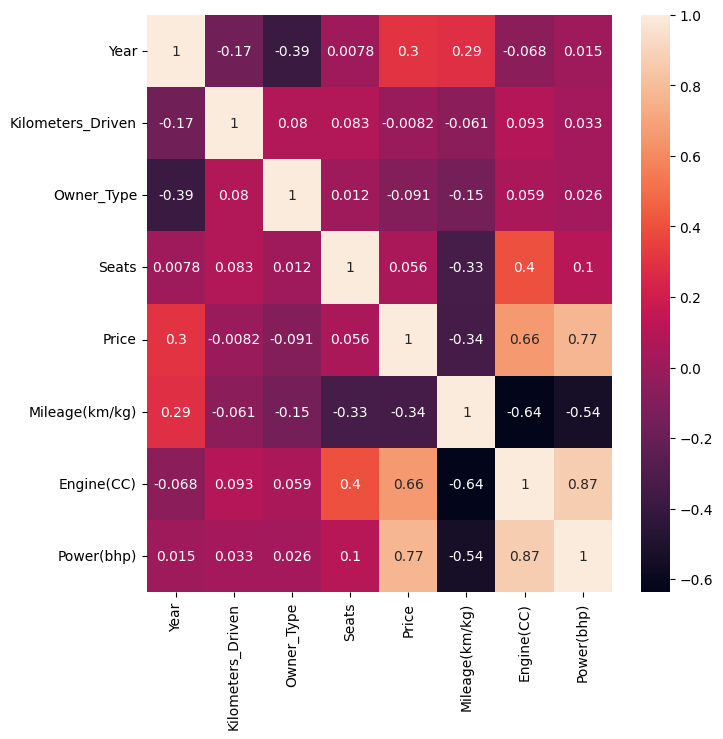

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7.5,7.5))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
# Features Selection
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

<ipython-input-82-503ca4ac183d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X,y)


ExtraTreesRegressor()

In [ ]:
# spliting the data to train and test for the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.7029876883652064
Accuracy on Testing set:  0.7222488386672661


In [ ]:

from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

<ipython-input-85-d4d870abb6b4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


Accuracy on Traing set:  0.9844975880185964
Accuracy on Testing set:  0.8768417298530246


In [ ]:
7# Ket luan: Thuat toan RandomForestRegressor tot hon thuat toan LinearRegression khi huan luyen voi bo du lieu nay